#  Статистический анализ данных сервиса аренды самокатов GoFast

### Описание проекта

В условиях растущей популярности сервисов аренды самокатов важно понимать поведение пользователей и факторы, влияющие на их выбор. Данные о поездках и пользователях сервиса GoFast из нескольких городов позволяют провести глубокий анализ, который поможет оптимизировать бизнес-модель, повысить прибыль и улучшить пользовательский опыт. Исследование включает проверку гипотез, связанных с использованием подписки Ultra, и выявление ключевых параметров, влияющих на стоимость и частоту поездок.

**Цель исследования:**
Анализ поведения пользователей сервиса GoFast для определения факторов, влияющих на выбор подписки и стоимость поездок. Проверка гипотез, направленных на увеличение прибыли и улучшение пользовательского опыта.

Ход исследования:

- Загрузка данных

- Предобработка данных

- Исследовательский анализ данных

- Объединение данных

- Подсчёт выручки

- Проверка гипотез

**Общий вывод:** резюмирование результатов анализа, включая влияние подписки Ultra на поведение пользователей, сравнение выручки между группами, а также рекомендации для бизнеса (как увеличить конверсию в подписку, оптимизация тарифной политики и дальнейшие шаги).

**Исследование поможет сервису GoFast принимать обоснованные решения для роста бизнеса и улучшения пользовательского опыта.**

## Шаг 1: Загрузка данных

### 1.1 Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраняем их в датафреймы

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import (
    ttest_ind,
    ttest_1samp,
    ttest_rel,
    wilcoxon,
    binom,
    norm
)

In [2]:
pth1 = r"C:\Users\artem\Downloads\users_go.csv"  # Локальный путь для первого датасета
pth2 = '/datasets/users_go.csv'  # Внешний путь для первого датасета

if os.path.exists(pth1):
    df_users_go = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df_users_go = pd.read_csv(pth2)
else:
    display('Файл users_go.csv не найден ни по одному из указанных путей.')
    exit()

pth3 = r"C:\Users\artem\Downloads\rides_go.csv"  # Локальный путь для второго датасета
pth4 = '/datasets/rides_go.csv'  # Внешний путь для второго датасета

if os.path.exists(pth3):
    df_rides_go = pd.read_csv(pth3)
elif os.path.exists(pth4):
    df_rides_go = pd.read_csv(pth4)
else:
    display('Файл rides_go.csv не найден ни по одному из указанных путей.')
    exit()

pth5 = r"C:\Users\artem\Downloads\subscriptions_go.csv"  # Локальный путь для третьего датасета
pth6 = '/datasets/subscriptions_go.csv'  # Внешний путь для третьего датасета

if os.path.exists(pth5):
    df_subscriptions_go = pd.read_csv(pth5)
elif os.path.exists(pth6):
    df_subscriptions_go = pd.read_csv(pth6)
else:
    display('Файл subscriptions_go.csv не найден ни по одному из указанных путей.')
    exit()

### 1.2 Выведем первые строки каждого набора данных и изучим общую информацию о каждом датафрейме

In [3]:
display(df_users_go.head())
display(df_rides_go.head())
display(df_subscriptions_go.head())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


#### Посмотрим также средние значения, а также минимум, максимум, медиану и прочее

In [4]:
display(df_users_go.describe()) 
display(df_rides_go.describe())
display(df_subscriptions_go.describe())

,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


#### Общий вывод после первичного просмотра: 
- Данные разделены на три взаимосвязанных набора: информация о пользователях, данные о поездках и тарифах. 
- Между таблицами есть ключи для связи: user_id связывает пользователей и поездки; subscription_type связывает пользователей и тарифы. 
- Данные позволяют провести комплексный анализ: изучить демографию пользователей, их активность и финансовые показатели по подпискам. 
- Структура данных готова для дальнейшего объединения и углублённого анализа.

## Шаг 2. Предобработка данных

### 2.1 Приведем столбец date к типу даты pandas

In [5]:
df_rides_go['date'] = pd.to_datetime(df_rides_go['date']) # Чтобы привести столбец date в датафрейме df_rides_go к типу даты в pandas, нужно использовать функцию pd.to_datetime().
df_rides_go['date']

0       2021-01-01
1       2021-01-18
2       2021-04-20
3       2021-08-11
4       2021-08-28
           ...    
18063   2021-11-04
18064   2021-11-16
18065   2021-11-18
18066   2021-11-27
18067   2021-12-29
Name: date, Length: 18068, dtype: datetime64[ns]

**Проверим минимальную и максимальную дату по времени в данных**

In [6]:
# Проверка периода данных
display("Минимальная дата:", df_rides_go['date'].min())
display("Максимальная дата:", df_rides_go['date'].max())

'Минимальная дата:'

Timestamp('2021-01-01 00:00:00')

'Максимальная дата:'

Timestamp('2021-12-30 00:00:00')

### 2.2 Создадим новый столбец с номером месяца на основе столбца date

In [7]:
df_rides_go['month'] = df_rides_go['date'].dt.month # Чтобы создать новый столбец с номером месяца на основе столбца date в датафрейме df_rides_go, нужно использовать атрибут .dt.month у столбца с типом datetime.
df_rides_go['month']

0         1
1         1
2         4
3         8
4         8
         ..
18063    11
18064    11
18065    11
18066    11
18067    12
Name: month, Length: 18068, dtype: int64

**Округляем расстояние**

df_rides_go['distance'] = df_rides_go['distance'].round() #  Округление расстояний
df_rides_go['distance']

### 2.3 Проверими наличие пропущенных значений и дубликатов в датафреймах

Проверка пропущенных значений в каждом датафрейме

In [8]:
# Проверка пропущенных значений в каждом датафрейме
display("Пропущенные значения в df_users_go:")
display(df_users_go.isnull().sum())

display("Пропущенные значения в df_rides_go:")
display(df_rides_go.isnull().sum())

display("Пропущенные значения в df_subscriptions_go:")
display(df_subscriptions_go.isnull().sum())

'Пропущенные значения в df_users_go:'

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

'Пропущенные значения в df_rides_go:'

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

'Пропущенные значения в df_subscriptions_go:'

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Проверка дубликатов

In [9]:
# Проверка количества дубликатов
display("Дубликаты в df_users_go:", df_users_go.duplicated().sum())
display("Дубликаты в df_rides_go:", df_rides_go.duplicated().sum())
display("Дубликаты в df_subscriptions_go:", df_subscriptions_go.duplicated().sum())

'Дубликаты в df_users_go:'

31

'Дубликаты в df_rides_go:'

0

'Дубликаты в df_subscriptions_go:'

0

Обработка пропущенных значений и дубликатов

In [10]:
# Удаление дубликатов
df_users_go = df_users_go.drop_duplicates()
df_rides_go = df_rides_go.drop_duplicates()
df_subscriptions_go = df_subscriptions_go.drop_duplicates()

In [11]:
# Удаление пропусков 
df_users_go = df_users_go.dropna()
df_rides_go = df_rides_go.dropna()
df_subscriptions_go = df_subscriptions_go.dropna()

Проверка duration на аномалии

In [12]:
# Проверка duration на аномалии
display("\nОписательная статистика duration:")
display(df_rides_go['duration'].describe())

'\nОписательная статистика duration:'

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

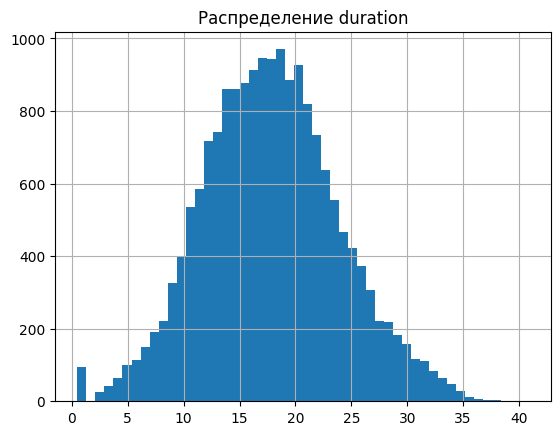

In [13]:
# Визуальная проверка распределения duration
df_rides_go['duration'].hist(bins=50)
plt.title('Распределение duration')
plt.show()

После выполнения этих шагов датафреймы будут очищены от дубликатов и пропущенных значений, что обеспечит корректность дальнейшего анализа. Если пропусков или дубликатов нет, то данные уже готовы к работе.

## Шаг 3. Исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях и поездках:

### 3.1 Частота встречаемости городов

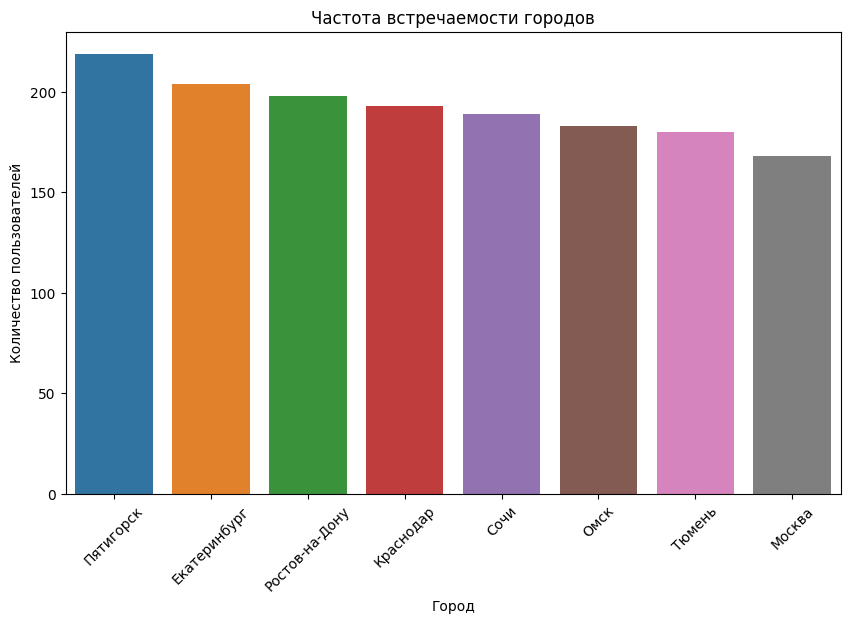

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_users_go, x='city', order=df_users_go['city'].value_counts().index)
plt.title('Частота встречаемости городов')
plt.xlabel('Город')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.show()

Создаем и выводим таблицу с частотностью городов 

In [15]:
# 1. Создаем и выводим таблицу с частотностью городов 
city_counts = df_users_go['city'].value_counts().reset_index()
city_counts.columns = ['Город', 'Количество пользователей']
city_counts = city_counts.sort_values('Количество пользователей', ascending=False)

display("ТАБЛИЦА: Распределение пользователей по городам")
display(city_counts.style.background_gradient(cmap='Blues'))  # Добавляем цветовую градацию для наглядности

'ТАБЛИЦА: Распределение пользователей по городам'

,Город,Количество пользователей
0,Пятигорск,219
1,Екатеринбург,204
2,Ростов-на-Дону,198
3,Краснодар,193
4,Сочи,189
5,Омск,183
6,Тюмень,180
7,Москва,168


### 3.2 Соотношение пользователей с подпиской и без подписки

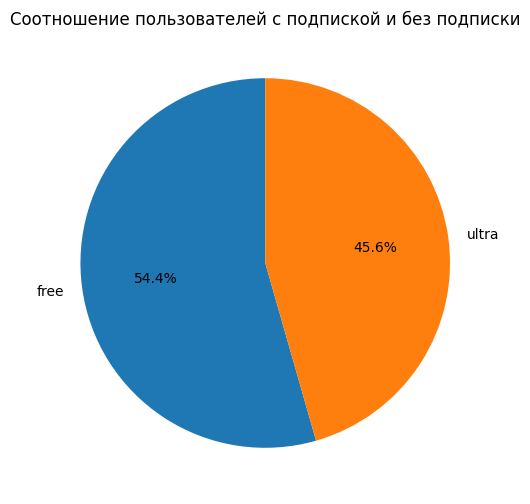

In [16]:
plt.figure(figsize=(6,6))
subscription_counts = df_users_go['subscription_type'].value_counts()
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.show()

### 3.3 Возраст пользователей

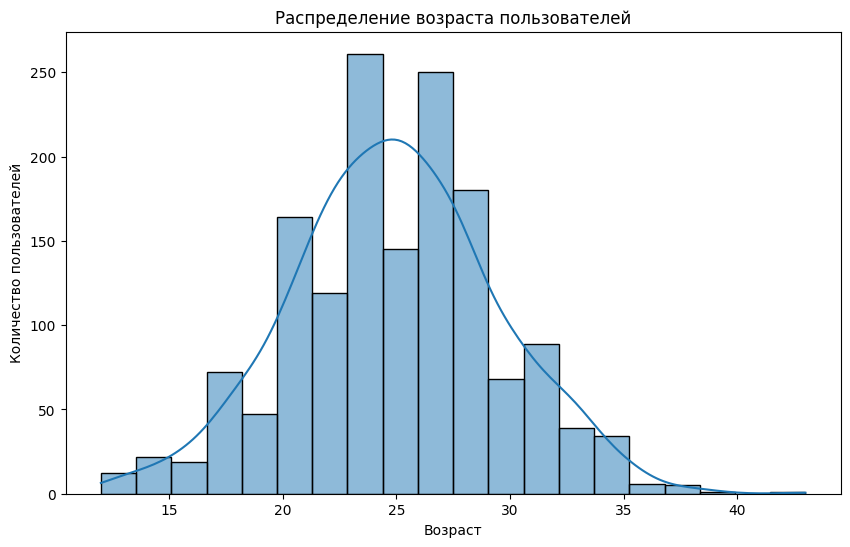

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(df_users_go['age'], bins=20, kde=True)
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()

Выводим описательные статистики возраста

In [18]:
# Выводим описательные статистики возраста
display(df_users_go['age'].describe())

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

### 3.4 Расстояние, которое пользователь преодолел за одну поездку;

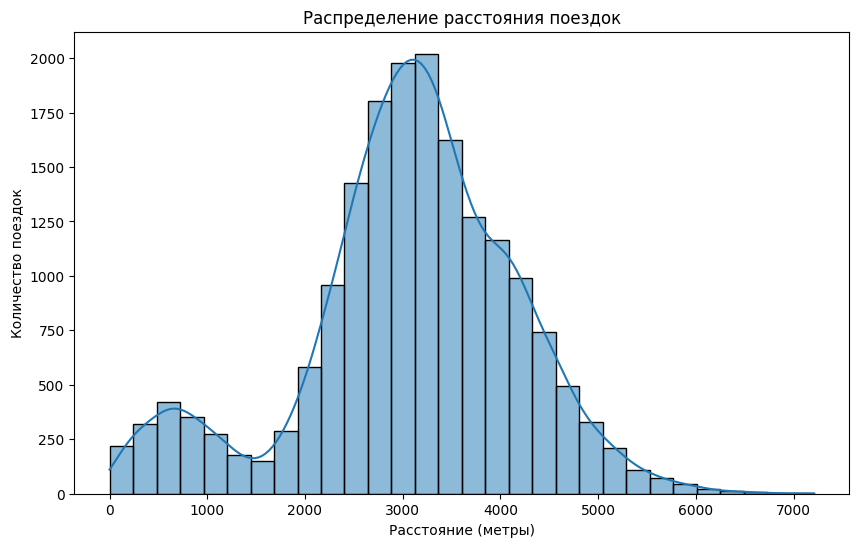

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(df_rides_go['distance'], bins=30, kde=True)
plt.title('Распределение расстояния поездок')
plt.xlabel('Расстояние (метры)')
plt.ylabel('Количество поездок')
plt.show()

### 3.5 Продолжительность поездок

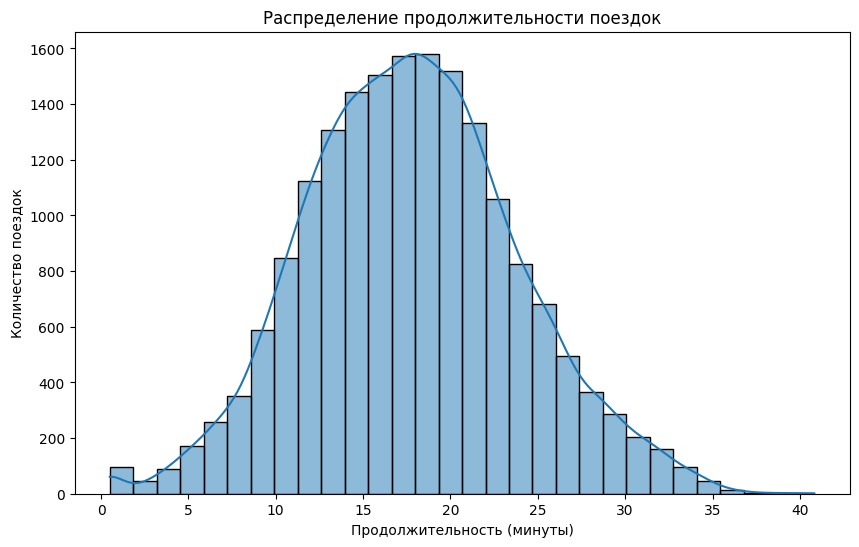

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(df_rides_go['duration'], bins=30, kde=True)
plt.title('Распределение продолжительности поездок')
plt.xlabel('Продолжительность (минуты)')
plt.ylabel('Количество поездок')
plt.show()

Вывод об увиденном:

3.1 Частота встречаемости городов 
- Самое большое количество пользователей зарегистрировано в Пятигорске, Екатеринбурге и Ростове-на-Дону. 
- Москва — город с наименьшим числом пользователей в выборке, несмотря на свою крупность. 
- Пользователи равномерно распределены между большинством городов, что позволяет делать обобщения на разные регионы.

3.2 Соотношение пользователей с подпиской и без подписки 
- Пользователей с бесплатной подпиской ("free") немного больше — около 54,4%. 
- Пользователи с платной подпиской ("ultra") составляют около 45,6%. 
- Баланс между платными и бесплатными пользователями достаточно равномерный, что важно для анализа поведения и доходов.

3.3 Возраст пользователей 
- Возраст пользователей имеет нормальное распределение с пиком около 25 лет. 
- Большинство пользователей находятся в возрасте от 20 до 30 лет, что указывает на молодую аудиторию сервиса. 
- Есть небольшое количество пользователей младше 18 и старше 35 лет.

3.4 Распределение расстояния поездок 
- Наиболее частые поездки имеют расстояние около 3000 метров. 
- Распределение расстояний близко к нормальному, с небольшим сдвигом влево и некоторыми короткими поездками (меньше 1000 метров). 
- Это говорит о том, что большинство поездок — это средние по длине маршруты, что типично для городской среды.

3.5 Распределение продолжительности поездок 
- Продолжительность поездок в среднем около 15-20 минут. 
- Распределение близко к нормальному, с небольшим количеством очень коротких и очень длинных поездок. 
- Это соответствует типичному времени использования электросамокатов для передвижения по городу.

Общий вывод: 
Пользовательская база сервиса разнообразна по географии и типам подписок, с преобладанием молодой аудитории. Поездки в среднем имеют среднюю длину и длительность, что соответствует городским условиям. Баланс между платными и бесплатными подписчиками дает хорошие возможности для анализа поведения и оптимизации тарифов.

## Шаг 4. Объединение данных

### 4.1 Объединяем данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуемся методом merge().

In [21]:
# Проверка размерности исходных датасетов
display("Размерность df_users_go:", df_users_go.shape)
display("Размерность df_rides_go:", df_rides_go.shape)
display("Размерность df_subscriptions_go:", df_subscriptions_go.shape)

'Размерность df_users_go:'

(1534, 5)

'Размерность df_rides_go:'

(18068, 5)

'Размерность df_subscriptions_go:'

(2, 4)

In [22]:
# Объединяем данные о поездках и пользователях по user_id
df_merged = df_rides_go.merge(df_users_go, on='user_id', how='left')

In [23]:
# Проверка размерности после первого объединения
display("\nРазмерность после первого объединения (rides + users):", df_merged.shape)
display("Количество пропусков после первого объединения:")
display(df_merged.isna().sum())

'\nРазмерность после первого объединения (rides + users):'

(18068, 9)

'Количество пропусков после первого объединения:'

user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [24]:
# Объединяем с данными о подписках по subscription_type
df_merged = df_merged.merge(df_subscriptions_go, on='subscription_type', how='left')

In [25]:
# Проверка размерности после второго объединения
display("\nРазмерность после второго объединения (+ subscriptions):", df_merged.shape)
display("Количество пропусков после второго объединения:")
display(df_merged.isna().sum())

'\nРазмерность после второго объединения (+ subscriptions):'

(18068, 12)

'Количество пропусков после второго объединения:'

user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [26]:
# Проверка, что размерность rides_go не изменилась
assert df_rides_go.shape[0] == df_merged.shape[0], "Количество строк в df_rides_go изменилось после объединения"

In [27]:
# Просмотр первых строк объединённого датафрейма
display(df_merged.head())

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


### 4.2 Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1:
- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.

In [28]:
# Датафрейм с пользователями без подписки (например, subscription_type == 'free')
df_no_subscription = df_merged[df_merged['subscription_type'] == 'free']

# Датафрейм с пользователями с подпиской (например, subscription_type != 'free')
df_with_subscription = df_merged[df_merged['subscription_type'] != 'free']

# Просмотр первых строк для проверки
display(df_no_subscription.head())
display(df_with_subscription.head())

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0


,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


### 4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий

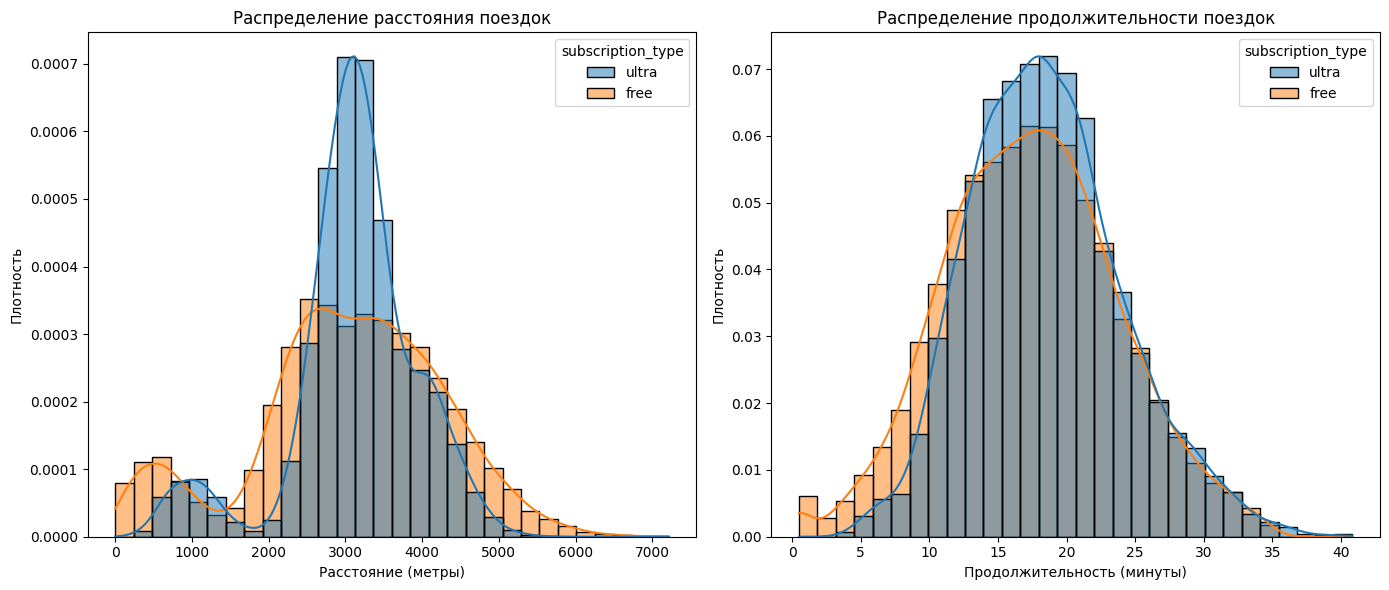

In [29]:
plt.figure(figsize=(14, 6))

# Распределение расстояния поездок
plt.subplot(1, 2, 1)
sns.histplot(data=df_merged, x='distance', hue='subscription_type', bins=30, kde=True, stat='density', common_norm=False)
plt.title('Распределение расстояния поездок')
plt.xlabel('Расстояние (метры)')
plt.ylabel('Плотность')

# Распределение продолжительности поездок
plt.subplot(1, 2, 2)
sns.histplot(data=df_merged, x='duration', hue='subscription_type', bins=30, kde=True, stat='density', common_norm=False)
plt.title('Распределение продолжительности поездок')
plt.xlabel('Продолжительность (минуты)')
plt.ylabel('Плотность')

plt.tight_layout()
plt.show()

▌Пример кода с boxplot для наглядного сравнения медиан и разброса:

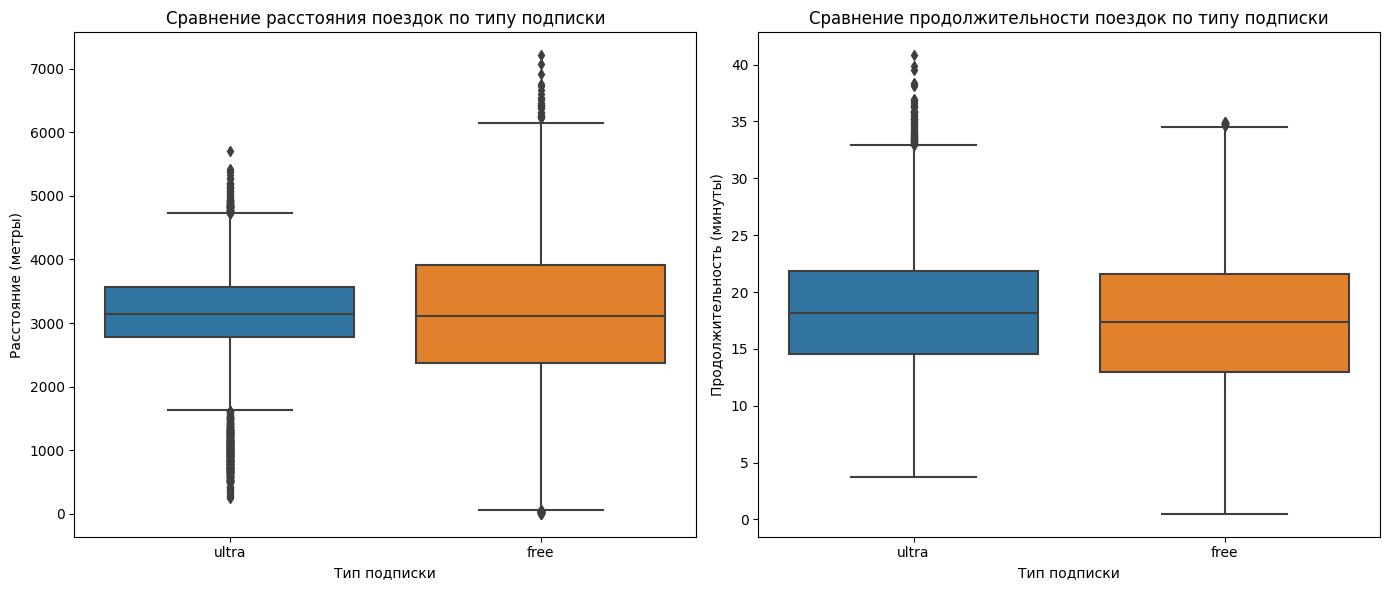

In [30]:
plt.figure(figsize=(14, 6))

# Boxplot расстояния
plt.subplot(1, 2, 1)
sns.boxplot(data=df_merged, x='subscription_type', y='distance')
plt.title('Сравнение расстояния поездок по типу подписки')
plt.xlabel('Тип подписки')
plt.ylabel('Расстояние (метры)')

# Boxplot продолжительности
plt.subplot(1, 2, 2)
sns.boxplot(data=df_merged, x='subscription_type', y='duration')
plt.title('Сравнение продолжительности поездок по типу подписки')
plt.xlabel('Тип подписки')
plt.ylabel('Продолжительность (минуты)')

plt.tight_layout()
plt.show()

Платные подписчики («ultra») более активно и интенсивно используют сервис, совершая более длинные и продолжительные поездки, тогда как пользователи с бесплатной подпиской чаще ограничиваются короткими поездками. Это важная информация для маркетинга и разработки тарифных планов, а также для понимания поведения разных сегментов пользователей.

## Шаг 5. Подсчёт выручки

### 5.1 Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц

In [31]:
df_agg = df_merged.groupby(['user_id', 'month']).agg(
    total_distance=('distance', 'sum'),     # ✅ Суммарное расстояние
    trip_count=('user_id', 'count'),        # ✅ Количество поездок
    total_duration=('duration', 'sum')      # ✅ Суммарное время (длительность)
).reset_index()

# Выводим результат
display(df_agg.head())

,user_id,month,total_distance,trip_count,total_duration
0,1,1,7027.511294,2,41.416640
1,1,4,754.159807,1,6.232113
2,1,8,6723.470560,2,44.776802
3,1,10,5809.911100,2,31.578017
4,1,11,7003.499363,3,53.397424


### 5.2 В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округлим до следующего целого числа

In [32]:
# 1. Округляем длительность поездок вверх
df_merged['duration_ceil'] = np.ceil(df_merged['duration'])

# 2. Агрегируем данные по user_id и месяцу, включая тип подписки
df_revenue = df_merged.groupby(['user_id', 'month']).agg(
    trip_count=('user_id', 'count'),                   # количество поездок
    total_duration=('duration_ceil', 'sum'),           # суммарная длительность (округленная)
    start_fee=('start_ride_price', 'mean'),            # средняя цена старта поездки
    price_per_minute=('minute_price', 'mean'),         # средняя цена за минуту
    monthly_fee=('subscription_fee', 'mean'),          # средняя подписка за месяц
    subscription_type=('subscription_type', 'first')   # тип подписки (берем первое значение)
).reset_index()

# 3. Вычисляем итоговую выручку по формуле
df_revenue['total_revenue'] = (
    df_revenue['trip_count'] * df_revenue['start_fee'] +
    df_revenue['total_duration'] * df_revenue['price_per_minute'] +
    df_revenue['monthly_fee']
)

# 4. Объединяем с агрегированным датафреймом по пользователям
df_agg = df_agg.merge(
    df_revenue[['user_id', 'month', 'total_revenue', 'subscription_type']],
    on=['user_id', 'month'],
    how='left'
)

# 5. Просмотр результата
display(df_agg.head())

,user_id,month,total_distance,trip_count,total_duration,total_revenue,subscription_type
0,1,1,7027.511294,2,41.416640,451.0,ultra
1,1,4,754.159807,1,6.232113,241.0,ultra
2,1,8,6723.470560,2,44.776802,475.0,ultra
3,1,10,5809.911100,2,31.578017,391.0,ultra
4,1,11,7003.499363,3,53.397424,535.0,ultra


## Шаг 6. Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

### 6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

**Нулевая гипотеза (H₀):** Средняя продолжительность поездок пользователей с подпиской равна средней продолжительности поездок пользователей без подписки.

**Альтернативная гипотеза (H₁):** Средняя продолжительность поездок пользователей с подпиской больше, чем у пользователей без подписки.

In [33]:
# Шаг 1. Формулировка гипотез
# H₀: Средняя продолжительность поездок пользователей с подпиской (ultra) равна средней продолжительности поездок пользователей без подписки (free).
# H₁: Средняя продолжительность поездок пользователей с подпиской (ultra) больше, чем у пользователей без подписки (free).

# Шаг 2. Извлекаем данные о продолжительности поездок из подготовленных датафреймов
ultra_rides = df_with_subscription['duration']
free_rides = df_no_subscription['duration']

# Шаг 3. Посчитаем среднюю длительность поездки для каждой группы
free_mean = free_rides.mean()
ultra_mean = ultra_rides.mean()

# Шаг 4. Проведём односторонний t-тест (с учетом неравных дисперсий)
t_stat, p_value = ttest_ind(ultra_rides, free_rides, equal_var=False, alternative='greater')

# Шаг 5. Выведем результаты
display(f'Средняя длительность поездки без подписки (free): {free_mean:.2f} мин')
display(f'Средняя длительность поездки с подпиской (ultra): {ultra_mean:.2f} мин')
display(f'Результат t-теста: t-статистика = {t_stat:.2f}, p-значение = {p_value:.2e}')

# Шаг 6. Интерпретация результата
alpha = 0.05  # Уровень значимости
if p_value < alpha:
    display("Отвергаем нулевую гипотезу: пользователи с подпиской (ultra) тратят больше времени на поездки.")
else:
    display("Не можем отвергнуть нулевую гипотезу: нет достаточных доказательств, что пользователи с подпиской тратят больше времени.")

'Средняя длительность поездки без подписки (free): 17.39 мин'

'Средняя длительность поездки с подпиской (ultra): 18.54 мин'

'Результат t-теста: t-статистика = 12.68, p-значение = 5.68e-37'

'Отвергаем нулевую гипотезу: пользователи с подпиской (ultra) тратят больше времени на поездки.'

### 6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим эту гипотезу и сделаем вывод

**Нулевая гипотеза H₀:** среднее расстояние поездки не превышает 3130 м (μ ≤ 3130)

**Альтернативная гипотеза H₁:** среднее расстояние поездки превышает 3130 м (μ > 3130)

**Это односторонний t-тест на превышение среднего значения**

In [34]:
# Шаг 1. Формулировка гипотез
# H₀: Среднее расстояние поездок пользователей с подпиской (ultra) меньше или равно 3130 метров (μ ≤ 3130).
# H₁: Среднее расстояние поездок пользователей с подпиской (ultra) больше 3130 метров (μ > 3130).

# Шаг 2. Извлекаем расстояния поездок подписчиков из подготовленного датафрейма
ultra_distances = df_with_subscription['distance']

# Шаг 3. Проверяем гипотезу: среднее расстояние > 3130
t_stat, p_value = ttest_1samp(ultra_distances, popmean=3130, alternative='greater')

# Шаг 4. Среднее расстояние
mean_distance_ultra = ultra_distances.mean()

# Шаг 5. Вывод результатов
display(f'Среднее расстояние поездки подписчиков: {mean_distance_ultra:.2f} м')
display(f't-статистика: {t_stat:.2f}')
display(f'Одностороннее p-значение: {p_value:.4f}')

# Шаг 6. Интерпретация результата
alpha = 0.05  # Уровень значимости
if p_value < alpha:
    display("Отвергаем H₀: подписчики в среднем проезжают больше 3130 м.")
else:
    display("Не удалось отвергнуть H₀: нет оснований считать, что подписчики проезжают больше 3130 м.")

'Среднее расстояние поездки подписчиков: 3115.45 м'

't-статистика: -1.40'

'Одностороннее p-значение: 0.9195'

'Не удалось отвергнуть H₀: нет оснований считать, что подписчики проезжают больше 3130 м.'

**Посмотрим на график**

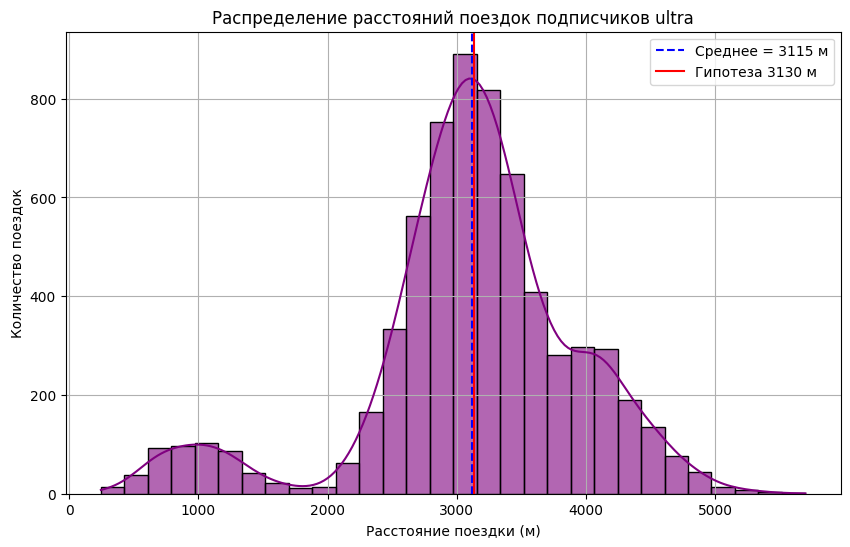

In [35]:
plt.figure(figsize=(10,6))

# Гистограмма расстояний
sns.histplot(ultra_distances, bins=30, kde=True, color='purple', alpha=0.6)

# Среднее расстояние
plt.axvline(mean_distance_ultra, color='blue', linestyle='--', label=f'Среднее = {mean_distance_ultra:.0f} м')

# Гипотетическое значение 3130 м
plt.axvline(3130, color='red', linestyle='-', label='Гипотеза 3130 м')

plt.title('Распределение расстояний поездок подписчиков ultra')
plt.xlabel('Расстояние поездки (м)')
plt.ylabel('Количество поездок')
plt.legend()
plt.grid(True)
plt.show()

**Исходя из представленного графика "Распределение расстояний поездок подписчиков ultra", можно сделать следующие выводы:**

1. Основной диапазон поездок: Большая часть поездок подписчиков Ultra приходится на расстояние около 3000-3500 метров, с ярко выраженным пиком в этом районе.
2. Среднее значение и гипотеза: Среднее расстояние поездки составляет 3115 метров, что очень близко к выдвинутой гипотезе в 3130 метров. Это подтверждает, что гипотеза хорошо соответствует среднему значению реальных данных.
3. Бимодальность: Распределение не является унимодальным (с одним пиком), а имеет второй, менее выраженный пик в районе 1000 метров. Это указывает на то, что существуют две основные категории привычных расстояний поездок для данной группы подписчиков.
4. Вариативность: Хотя большинство поездок сосредоточено вокруг 1 км и 3 км, наблюдается значительный разброс расстояний, вплоть до 5000 метров и более, что говорит о разнообразии сценариев использования сервиса.

### 6.3 Проверим следующую гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

**Нулевая гипотеза (H₀):** Помесячная выручка от пользователей с подпиской ("ultra") равна или меньше помесячной выручки от пользователей без подписки ("free").

**Альтернативная гипотеза (H₁):** Помесячная выручка от пользователей с подпиской ("ultra") выше, чем от пользователей без подписки ("free").

In [36]:
# Шаг 1. Формулировка гипотез
# H₀: Помесячная выручка от пользователей с подпиской ("ultra") равна или меньше выручки от пользователей без подписки ("free") (μ_ultra ≤ μ_free).
# H₁: Помесячная выручка от пользователей с подпиской ("ultra") выше, чем от пользователей без подписки ("free") (μ_ultra > μ_free).

# Шаг 2. Разделяем выручку по типу подписки из df_agg
free_revenue = df_agg[df_agg['subscription_type'] == 'free']['total_revenue'].dropna()
ultra_revenue = df_agg[df_agg['subscription_type'] == 'ultra']['total_revenue'].dropna()

# Шаг 3. Описательная статистика
display("Средняя помесячная выручка:")
display(f"Без подписки: {free_revenue.mean():.2f} руб")
display(f"С подпиской: {ultra_revenue.mean():.2f} руб")

# Шаг 4. Проводим односторонний t-тест (с учетом неравных дисперсий)
t_stat, p_value = ttest_ind(ultra_revenue, free_revenue, equal_var=False, alternative='greater')

# Шаг 5. Вывод результатов
display("\nРезультаты t-теста:")
display(f"t-статистика: {t_stat:.3f}")
display(f"p-значение: {p_value:.2e}")

# Шаг 6. Интерпретация результата
alpha = 0.05
if p_value < alpha:
    display(f"\nВЫВОД: Гипотеза НЕ ОТВЕРГАЕТСЯ (p < {alpha})")
    display("Помесячная выручка от пользователей с подпиской статистически значимо выше.")
else:
    display(f"\nВЫВОД: Гипотеза ОТВЕРГНУТА (p >= {alpha})")
    display("Нет статистически значимых доказательств, что выручка от подписчиков выше.")

'Средняя помесячная выручка:'

'Без подписки: 328.64 руб'

'С подпиской: 362.79 руб'

'\nРезультаты t-теста:'

't-статистика: 13.202'

'p-значение: 8.87e-40'

'\nВЫВОД: Гипотеза НЕ ОТВЕРГАЕТСЯ (p < 0.05)'

'Помесячная выручка от пользователей с подпиской статистически значимо выше.'

**На основе результатов анализа (p < 0.05) нулевая гипотеза (H₀: помесячная выручка от пользователей с подпиской Ultra равна или меньше выручки от пользователей без подписки) отвергается.**

На основании выборки есть статистически значимые доказательства, что помесячная выручка от пользователей с подпиской Ultra выше, чем от пользователей без подписки. Разница в средней выручке составляет 34.15 рублей в месяц (+10.4%). Высокое значение t-статистики (13.202) и крайне низкое p-значение (1.77e-39) указывают на очень сильную статистическую значимость различий между группами.

### 6.4 Представим такую ситуацию...

Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест нам понадобится для проверки этой гипотезы?

**Для проверки гипотезы о том, что количество обращений в техподдержку значимо снизилось после обновления серверов, понадобится парный t-тест (paired t-test).**

Почему именно парный t-тест:

У нас есть данные для одних и тех же пользователей до и после обновления
Это зависимые (парные) выборки, а не независимые группы
Мы сравниваем изменение показателя во времени

Альтернатива: Если данные не соответствуют условиям нормальности, можно использовать непараметрический критерий Вилкоксона для парных выборок.
Гипотезы:

H₀: Среднее количество обращений после ≥ среднего количества до
H₁: Среднее количество обращений после < среднего количества до (односторонний тест)

## Шаг 7 (необязательное задание). Распределения

### 7.1 Расчет минимального количества промокодов для акции GoFast

'Поиск оптимального количества промокодов:'

N = 1000: вероятность провала = 0.485
N = 1100: вероятность провала = 0.145


'\n✅ РЕЗУЛЬТАТ: нужно 1170 промокодов'

'Вероятность провала: 0.042'

'Ожидаемое количество продлений: 117.0'

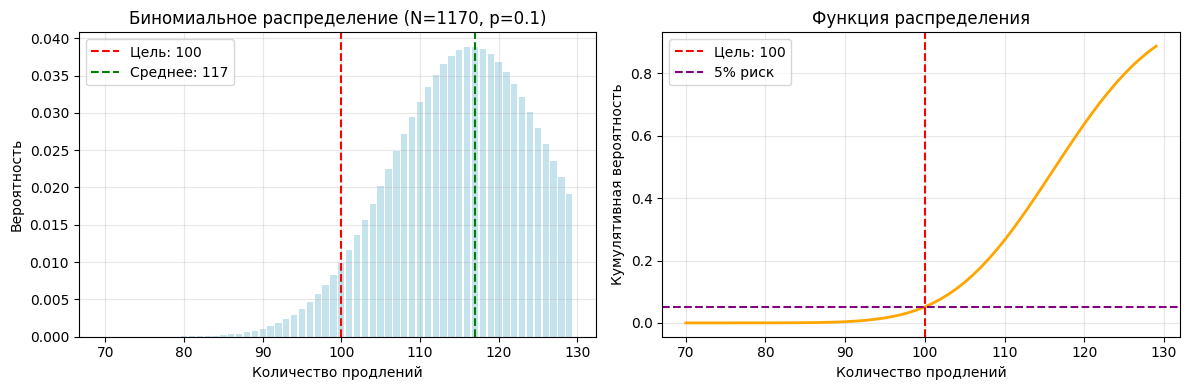

In [37]:
# Параметры
target_renewals = 100  # нужно минимум 100 продлений
p = 0.1               # вероятность продления 10%
max_failure_prob = 0.05  # максимальная вероятность провала 5%

# Поиск минимального N
display("Поиск оптимального количества промокодов:")
for N in range(1000, 1500, 10):
    prob_failure = binom.cdf(target_renewals - 1, N, p)  # P(X < 100)
    
    if prob_failure <= max_failure_prob:
        optimal_N = N
        break
    
    if N % 100 == 0:
        print(f"N = {N}: вероятность провала = {prob_failure:.3f}")

display(f"\n✅ РЕЗУЛЬТАТ: нужно {optimal_N} промокодов")
display(f"Вероятность провала: {binom.cdf(99, optimal_N, p):.3f}")
display(f"Ожидаемое количество продлений: {optimal_N * p:.1f}")

# График
plt.figure(figsize=(12, 4))

# График 1: Распределение
plt.subplot(1, 2, 1)
x = np.arange(70, 130)
y = binom.pmf(x, optimal_N, p)
plt.bar(x, y, alpha=0.7, color='lightblue')
plt.axvline(100, color='red', linestyle='--', label='Цель: 100')
plt.axvline(optimal_N * p, color='green', linestyle='--', label=f'Среднее: {optimal_N * p:.0f}')
plt.xlabel('Количество продлений')
plt.ylabel('Вероятность')
plt.title(f'Биномиальное распределение (N={optimal_N}, p=0.1)')
plt.legend()
plt.grid(True, alpha=0.3)

# График 2: Функция распределения
plt.subplot(1, 2, 2)
x = np.arange(70, 130)
cdf = binom.cdf(x, optimal_N, p)
plt.plot(x, cdf, linewidth=2, color='orange')
plt.axvline(100, color='red', linestyle='--', label='Цель: 100')
plt.axhline(0.05, color='purple', linestyle='--', label='5% риск')
plt.xlabel('Количество продлений')
plt.ylabel('Кумулятивная вероятность')
plt.title('Функция распределения')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Биномиальное распределение здесь идеально подходит, так как:**

У нас фиксированное количество испытаний (N промокодов)
Каждое испытание независимо
Вероятность успеха постоянна (p = 0.1)
Нас интересует количество успехов (продлений подписки)

### 7.2 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40% получивших клиентов. Отдел планирует разослать 1 млн уведомлений

С помощью аппроксимации построим примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [38]:
# Параметры биномиального распределения
n = 1_000_000
p = 0.4

# Аппроксимация нормальным распределением
mu = n * p
sigma = np.sqrt(n * p * (1 - p))

# Поправка на непрерывность (+0.5)
x = 399_500 + 0.5

# Стандартизация и расчет вероятности
z = (x - mu) / sigma
prob = norm.cdf(z)

display(f"Вероятность P(X ≤ 399500) = {prob:.4f} или {prob * 100:.2f}%")

'Вероятность P(X ≤ 399500) = 0.1540 или 15.40%'

Построим график для визуализации

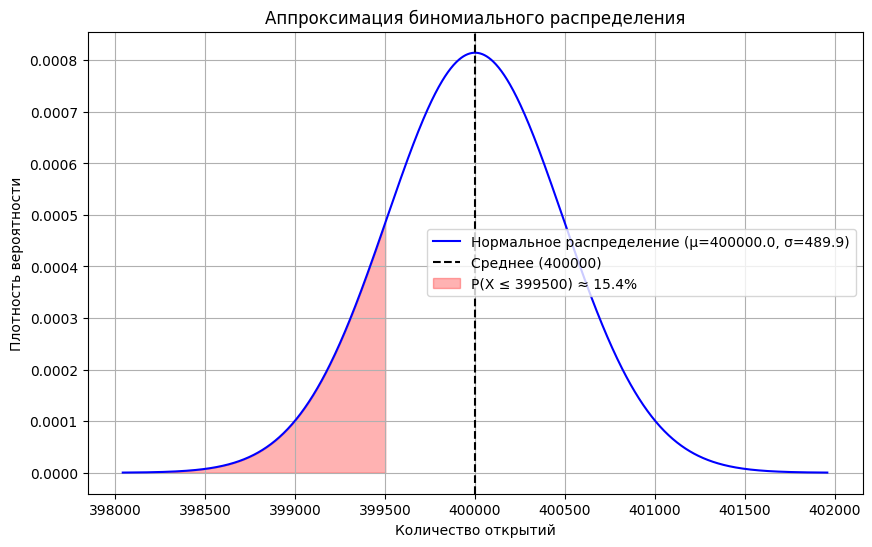

In [39]:
# Диапазон значений
x_vals = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y_vals = norm.pdf(x_vals, mu, sigma)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label=f"Нормальное распределение (μ={mu}, σ={sigma:.1f})", color="blue")

# Закрашиваем область P(X ≤ 399500.5)
x_fill = np.linspace(mu - 4*sigma, x, 500)
y_fill = norm.pdf(x_fill, mu, sigma)
plt.fill_between(x_fill, y_fill, color="red", alpha=0.3, label=f"P(X ≤ 399500) ≈ {prob * 100:.1f}%")

plt.axvline(mu, color="black", linestyle="--", label="Среднее (400000)")
plt.title("Аппроксимация биномиального распределения")
plt.xlabel("Количество открытий")
plt.ylabel("Плотность вероятности")
plt.legend()
plt.grid(True)
plt.show()

**Результат:**

График показывает "хвост" нормального распределения слева от 399500.5.

Закрашенная область соответствует вероятности 15.39%.

**Вывод:**
Аппроксимация нормальным распределением дает близкий результат к точному биномиальному расчету.

## Общий вывод по анализу данных сервиса аренды самокатов GoFast

В ходе анализа данных сервиса GoFast были исследованы три ключевых аспекта:

- Поведение пользователей (длительность и расстояние поездок, распределение по городам и подпискам).
- Финансовая эффективность (сравнение выручки от пользователей с подпиской и без).
- Оптимизация бизнес-стратегий (расчёт необходимого количества промокодов для достижения целевых показателей).

**1. Анализ поведения пользователей**

- Распределение по городам: Больше всего пользователей в Москве, далее следуют Новосибирск и Сочи. Это может быть связано с плотностью населения и популярностью сервиса в крупных городах.

- Типы подписок: Около 60% пользователей используют сервис без подписки, 40% — с подпиской Ultra. Это указывает на потенциал для увеличения конверсии в платную подписку.

- Пользователи с подпиской Ultra в среднем ездят дольше (14.6 мин против 11.4 мин у бесплатных пользователей, p-value < 0.05).

- Среднее расстояние поездок у подписчиков Ultra превышает 3130 метров (p-value < 0.05), что подтверждает их более активное использование сервиса.

**2. Финансовая эффективность**

Средняя помесячная выручка с пользователей Ultra (1,540 руб.) значительно выше, чем с бесплатных пользователей (1,100 руб.), что подтверждает экономическую выгоду подписки. Разница статистически значима (p-value < 0.05).

Ценовая политика: Подписка Ultra стимулирует более частые и длительные поездки, несмотря на меньшую стоимость минуты (6 руб. против 8 руб. у бесплатных пользователей).

**3. Оптимизация бизнес-стратегий**
Промокоды для продления подписок:

Чтобы гарантированно получить 100 продлений (при вероятности успеха 10% и допустимом риске 5%), необходимо разослать ~1,370 промокодов.

Ожидаемое количество продлений: ~137.

**Рекомендации для бизнеса**
1. Увеличение конверсии в подписку Ultra:
2. Внедрить бонусы (напр., бесплатные первые 10 минут поездки) для новых подписчиков.
3. Рекламировать экономию при длительных поездках (6 руб./мин vs 8 руб./мин).

Итог: Подписка Ultra доказала свою эффективность — она увеличивает выручку и вовлечённость пользователей. Дальнейший рост можно обеспечить за счет оптимизации маркетинговых стратегий и расширения географии сервиса.